In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




# CSV 파일 읽기
df = pd.read_csv('C:\\2023\\Summer\\Lg Aimers\\프로젝트\\프로젝트 데이터(제공)\\2023_AI\\train.csv')

# 각 열의 유일한 값들의 개수 계산
unique_counts = df.nunique()

print(unique_counts)


ID            15890
제품            15840
대분류               5
중분류              11
소분류              53
              ...  
2023-03-31      235
2023-04-01      228
2023-04-02      233
2023-04-03      257
2023-04-04      262
Length: 465, dtype: int64


# 23.9.5 과제1-2 


## 총 판매량에 대한 그래프

C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\1161010413.py:11: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\1161010413.py:11: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\1161010413.py:11: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\1161010413.py:11: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\1161010413.py:11: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\1161010413.py:11: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout

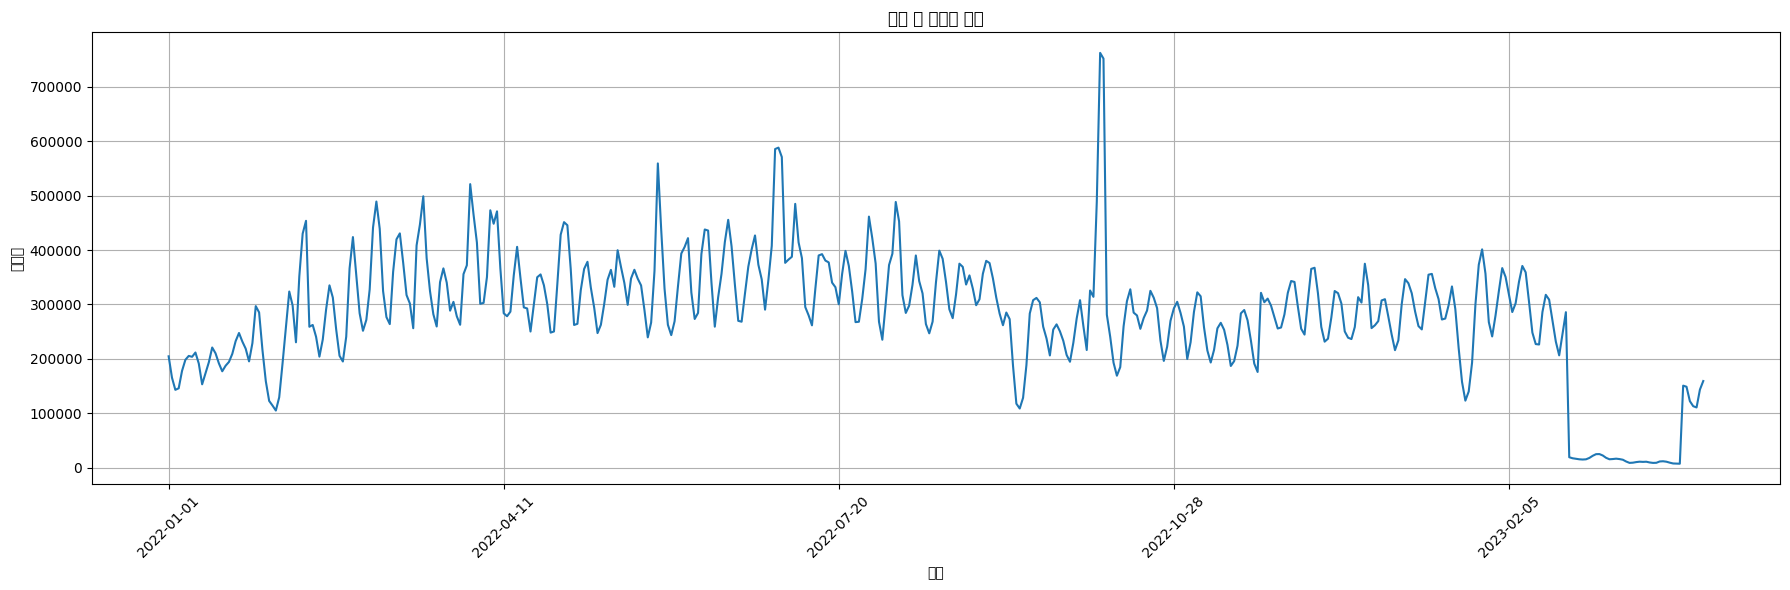

In [2]:


# 일별 판매량의 총합 계산
daily_sales = df.iloc[:, 6:].sum()

# 총 판매량의 변화를 선 그래프로 시각화
plt.figure(figsize=(18, 6))
daily_sales.plot()
plt.title("일별 총 판매량 변화")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


## 대분류, 중분류, 소분류 각각에 대한 판매량 변화 그래프

C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\3243136956.py:31: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\3243136956.py:31: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\3243136956.py:31: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\3243136956.py:31: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\3243136956.py:31: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\3243136956.py:31: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layou

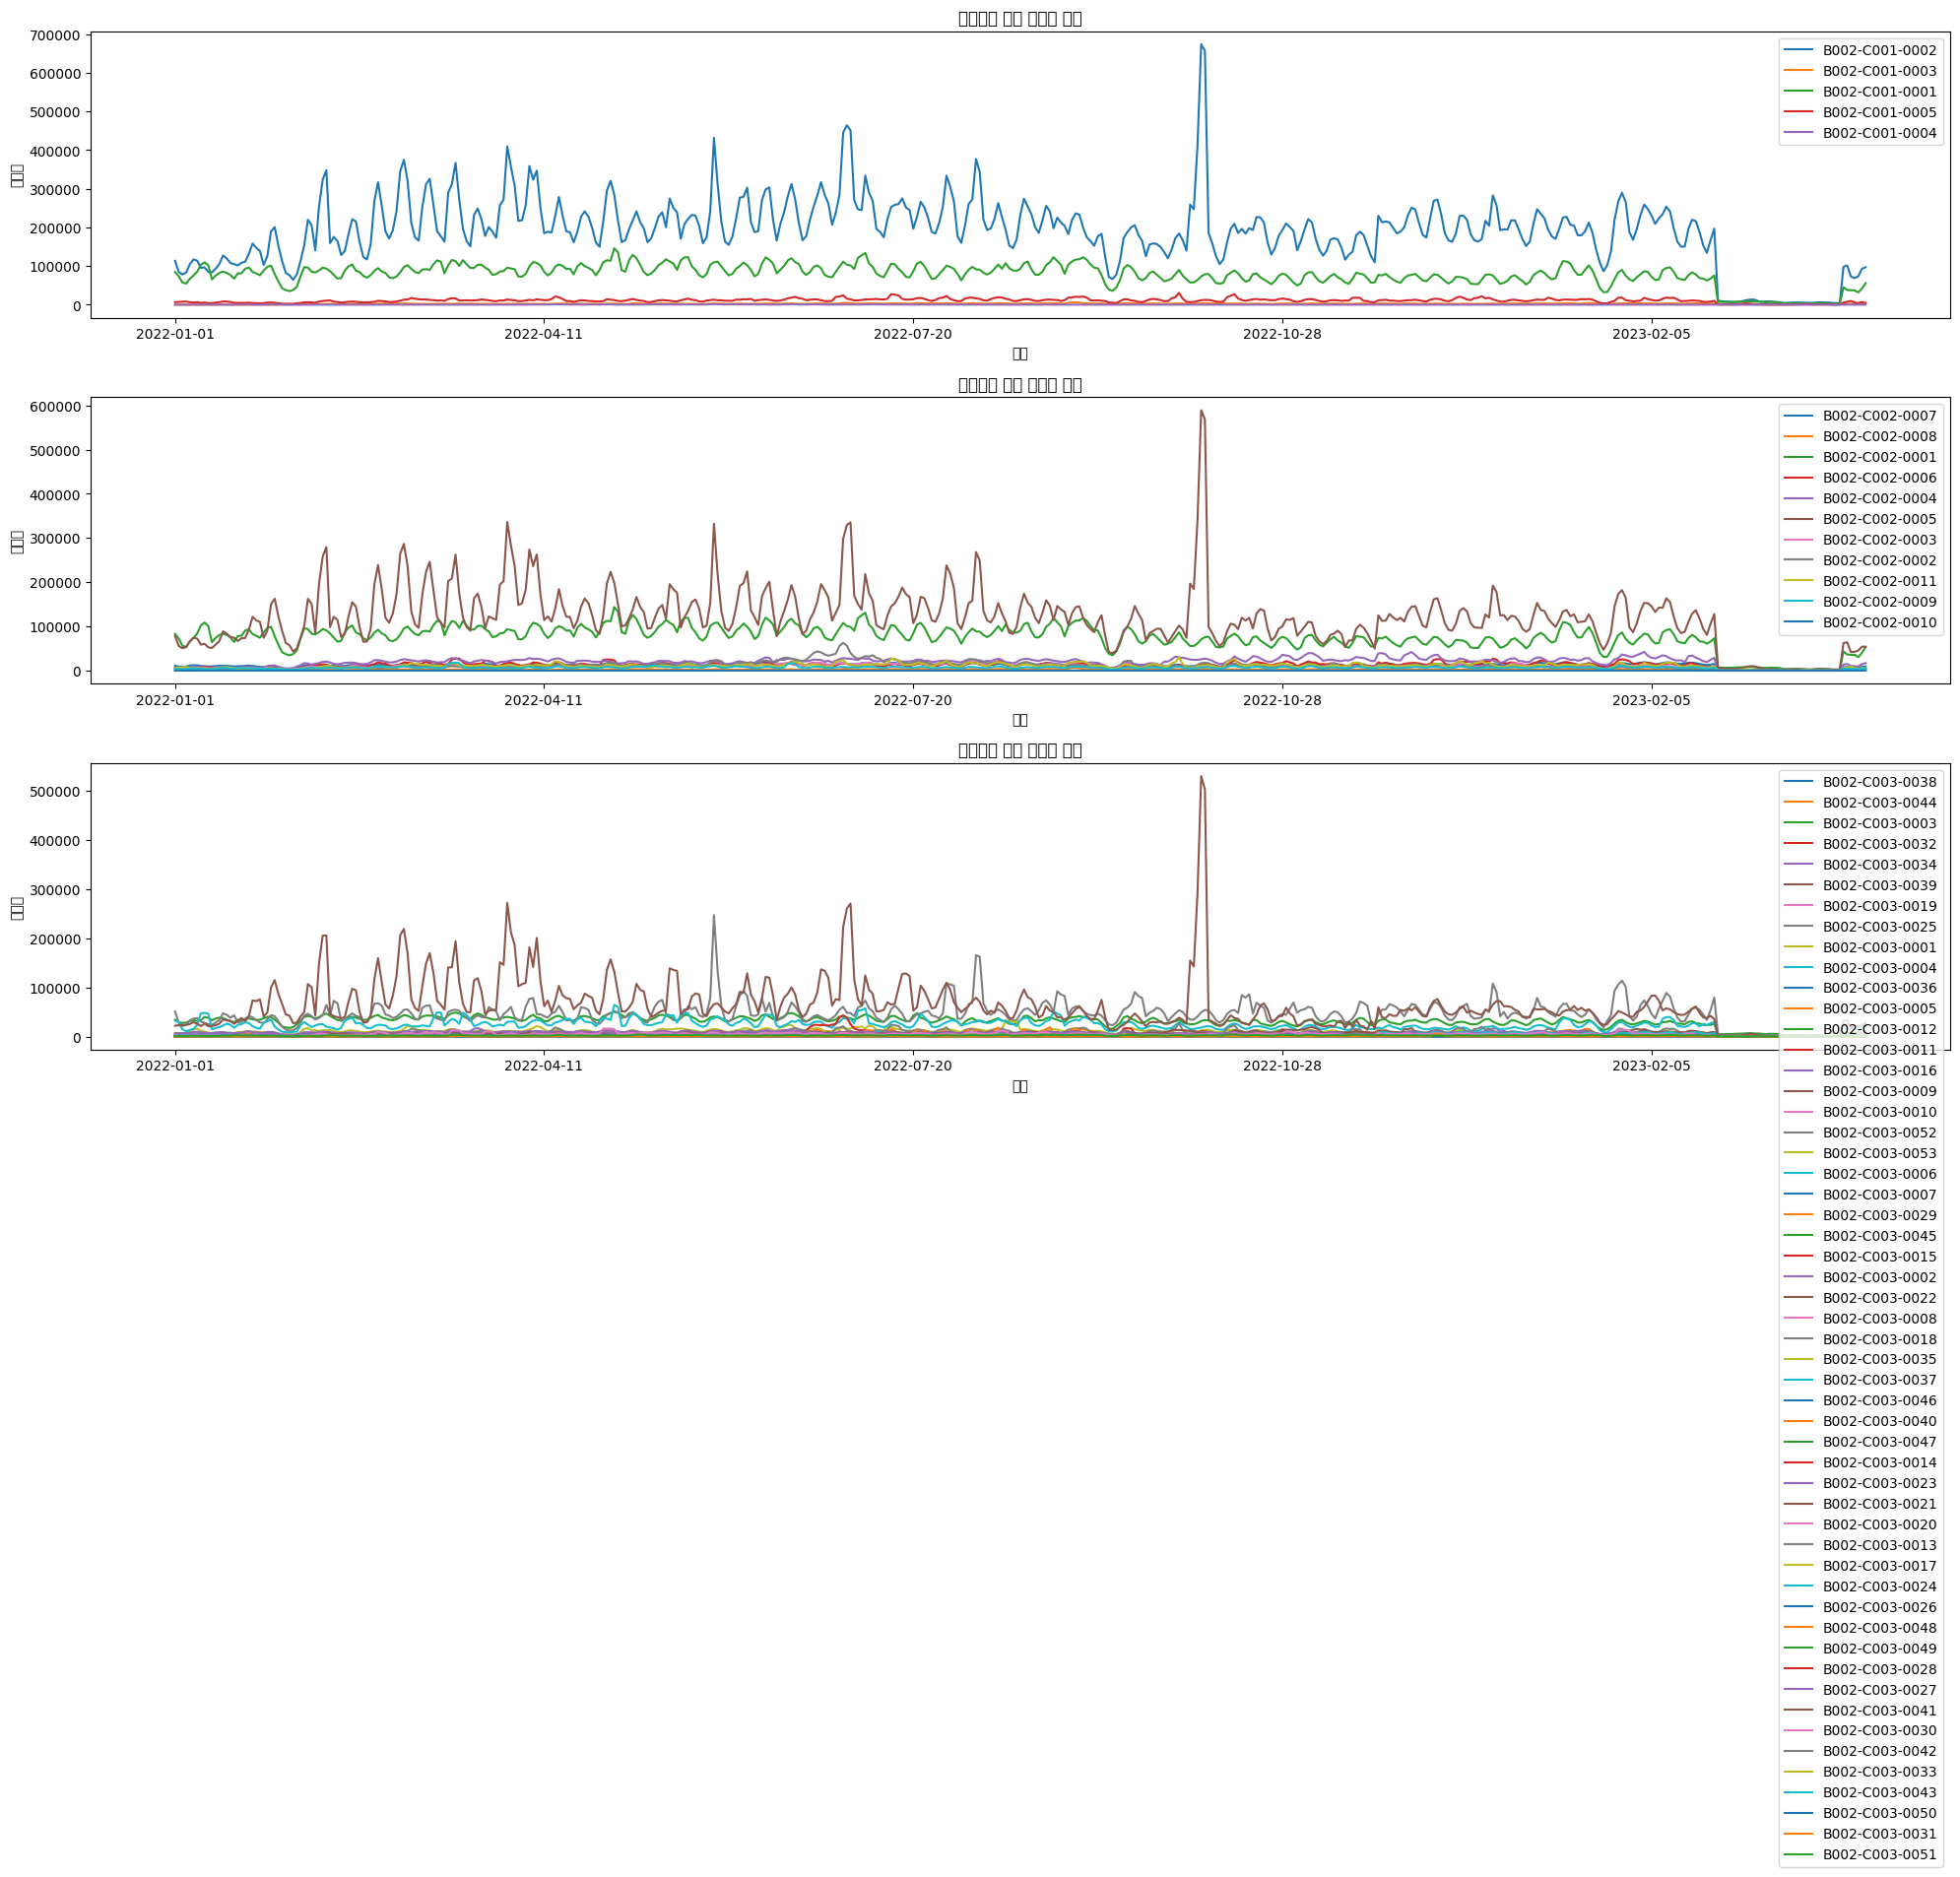

In [3]:
# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(20, 18))

# 대분류별 일별 판매량 변화
for category in df['대분류'].unique():
    subset = df[df['대분류'] == category]
    subset.iloc[:, 6:].sum().plot(ax=ax[0], label=category)
ax[0].set_title("대분류별 일별 판매량 변화")
ax[0].set_xlabel("날짜")
ax[0].set_ylabel("판매량")
ax[0].legend()

# 중분류별 일별 판매량 변화
for category in df['중분류'].unique():
    subset = df[df['중분류'] == category]
    subset.iloc[:, 6:].sum().plot(ax=ax[1], label=category)
ax[1].set_title("중분류별 일별 판매량 변화")
ax[1].set_xlabel("날짜")
ax[1].set_ylabel("판매량")
ax[1].legend()

# 소분류별 일별 판매량 변화
for category in df['소분류'].unique():
    subset = df[df['소분류'] == category]
    subset.iloc[:, 6:].sum().plot(ax=ax[2], label=category)
ax[2].set_title("소분류별 일별 판매량 변화")
ax[2].set_xlabel("날짜")
ax[2].set_ylabel("판매량")
ax[2].legend()

plt.tight_layout()
plt.show()


# 23.9.5 과제 1-1 (계절에 영향을 받는 데이터인지 파악하기)

C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\768557153.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


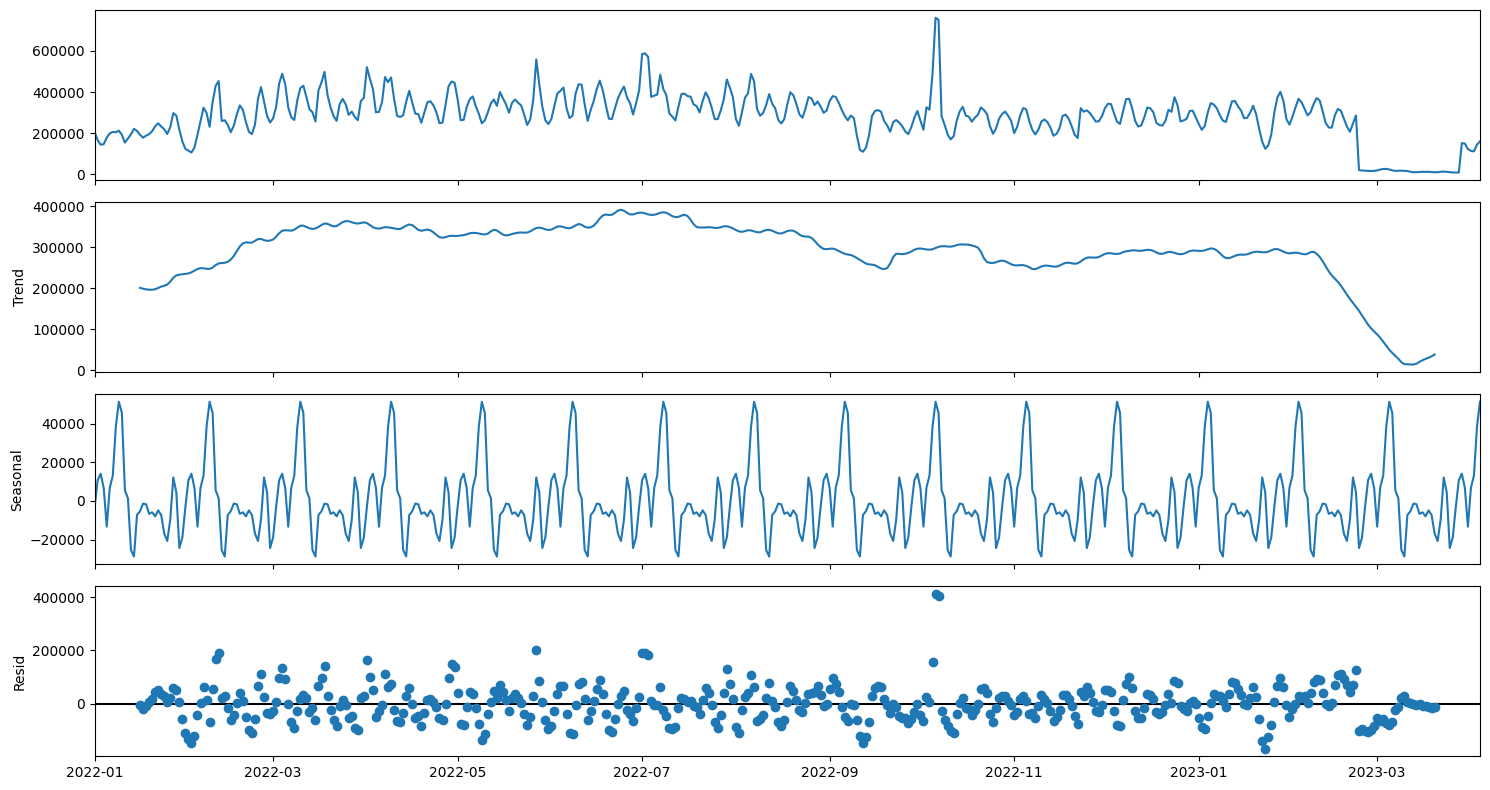

In [15]:
# 시계열 데이터의 계절성 분해 (월별 주기를 고려)
import statsmodels.api as sm


# 일별 총 판매량 계산
daily_total_sales = df.iloc[:, 6:].sum(axis=0)
daily_total_sales.index = pd.to_datetime(daily_total_sales.index)
# 시계열 데이터의 계절성 분해 (월별 주기를 고려)
decomposition_monthly = sm.tsa.seasonal_decompose(daily_total_sales, model='additive', period=30)

# 계절성 분해 결과 시각화
fig = decomposition_monthly.plot()
fig.set_size_inches(15, 8)
plt.tight_layout()
plt.show()


########## 위의 그래프는 데이터의 계절성을 월별 주기로 분해한 결과를 보여줍니다. 각 그래프의 의미는 다음과 같습니다:
원래 시계열 데이터 (Observed): 일별 총 판매량의 원래 시계열 데이터를 나타냅니다.
트렌드 (Trend): 원래 시계열 데이터에서 추출한 장기 트렌드를 나타냅니다.
계절성 (Seasonal): 원래 시계열 데이터에서 추출한 계절성 패턴을 나타냅니다.
잔차 (Residual): 원래 시계열 데이터에서 트렌드와 계절성을 제거한 후 남은 잔차를 나타냅니다.
이 결과를 통해 몇 가지 주요 사항을 파악할 수 있습니다:

트렌드 (Trend): 데이터의 전반적인 트렌드는 상승하는 것으로 보입니다.
계절성 (Seasonal): 월별 주기로 보았을 때 판매량에 일정한 계절성 패턴이 있음을 알 수 있습니다. 특히, 매월 특정 기간에 판매량이 높아지는 경향이 있습니다.
결론적으로, 제공된 데이터는 일정한 계절성 패턴을 보이며, 이는 월별 주기로 판매량에 영향을 미칠 수 있습니다. 이러한 정보는 향후 판매 전략 수립이나 재고 관리에 유용하게 활용될 수 있습니다.


## 날짜별 예측량


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 다시 읽기
sample_data = pd.read_csv('C:\\2023\\Summer\\Lg Aimers\\프로젝트\\프로젝트 데이터(제공)\\2023_AI\\Lg_Aimers_submission.csv')

# 일별 전체 제품의 총 판매량 계산
daily_total = sample_data.iloc[:, 1:].sum(axis=0)

# # 그래프 그리기
# plt.figure(figsize=(15, 6))
# daily_total.plot()
# plt.title("Total Sales Over Time")
# plt.xlabel("Date")
# plt.ylabel("Total Sales Quantity")
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# 각 제품별로 그래프 그리기 (효율적인 방법 사용)
plt.figure(figsize=(15, 8))

dates = sample_data.columns[1:]

for _, row in sample_data.iterrows():
    plt.plot(dates, row[1:], label=f"Product {row['ID']}")

plt.title("Sales Over Time for Each Product")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\jenny\AppData\Local\Temp\ipykernel_34188\2757814075.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: Image size of 1405x332860 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x800 with 1 Axes>